In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('ex1data1.txt',names=['population','profit'])
data.head()

,population,profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [3]:
data.tail()

,population,profit
92,5.8707,7.20290
93,5.3054,1.98690
94,8.2934,0.14454
95,13.3940,9.05510
96,5.4369,0.61705


In [4]:
data.describe()

,population,profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   population  97 non-null     float64
 1   profit      97 non-null     float64
dtypes: float64(2)
memory usage: 1.6 KB


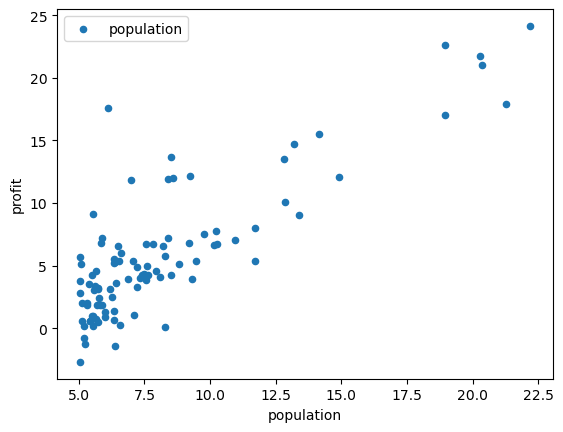

In [6]:
data.plot.scatter('population','profit',label='population')
plt.show()

In [7]:
data.insert(0,'$x_0$',1)
data.head()

,$x_0$,population,profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [8]:
cols = data.shape[1] # 获取 data 的列数
X = data.iloc[:,0:cols-1] # X 为 0~cols-1列，所有行
X.head()

,$x_0$,population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y = data.iloc[:,cols-1:cols] # y 为倒数第 1 列，所有行
y.head()

,profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
X = X.values

In [11]:
X.shape

(97, 2)

In [12]:
y = y.values

In [13]:
y.shape

(97, 1)

In [14]:
y = y.reshape(97,1)
y.shape

(97, 1)

In [ ]:
def normalEquation(X,y):
    theta = np.k

In [15]:
def costFunction(X,y,theta):
    inner =np.power( X @ theta - y, 2)  # power(*,2)使向量(Xθ-y)每一项平方，返回仍为向量
    return np.sum(inner) / (2 * len(X)) # 求向量每一项之和，结果相当于(Xθ-y)自身的内积

In [16]:
theta = np.zeros((2,1))
theta.shape

(2, 1)

In [17]:
cost_init = costFunction(X,y,theta)
print(cost_init)

32.072733877455676


In [18]:
def gradientDescent(X,y,theta,alpha,iters):   # iters为梯度下降中的迭代次数
    costs = []     # 将每次迭代的代价函数值保存在列表
    
    for i in range(iters):
        theta = theta - (X.T @ (X@theta - y) ) * alpha / len(X)
        cost = costFunction(X,y,theta)
        costs.append(cost)
        
        if i % 100 == 0:
            print(cost)    	#每迭代 100 次打印一次cost
            
    return theta,costs

In [19]:
alpha = 0.02
iters = 2000

theta,costs = gradientDescent(X,y,theta,alpha,iters)  #返回迭代  iters 次后

16.76964237166745
5.170668092303259
4.813840215803055
4.640559602034057
4.556412109403549
4.5155489085988645
4.495705166048674
4.486068766778817
4.481389196347322
4.479116731414093
4.478013190619409
4.477477295755764
4.477217057705424
4.477090682463859
4.477029312876824
4.476999510945953
4.476985038710984
4.476978010791016
4.476974597934662
4.476972940603823


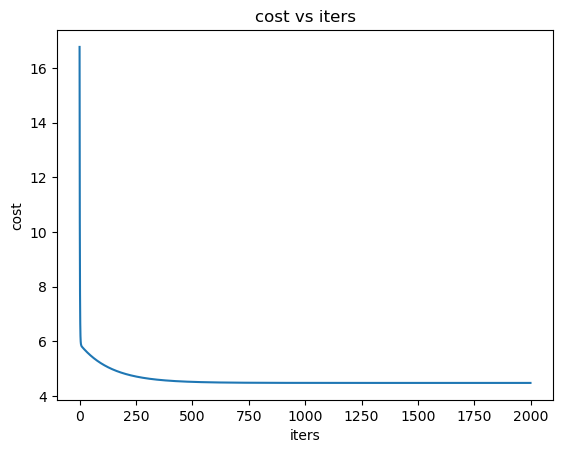

In [20]:
fig,ax = plt.subplots()
ax.plot(np.arange(iters),costs)
ax.set(xlabel='iters',
      ylabel='cost',
      title='cost vs iters')
plt.show()

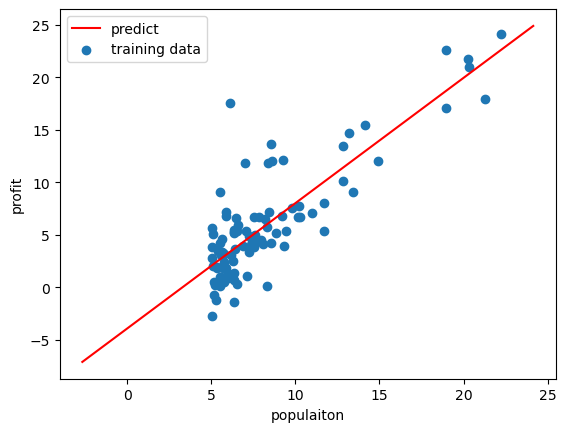

In [21]:
# 创建绘图实例
fig,ax = plt.subplots()

#绘制拟合直线
x = np.linspace(y.min(),y.max(),100)
y_new = theta[0,0] + theta[1,0] * x
ax.plot(x,y_new,'r',label='predict')

#绘制原始数据散点图
ax.scatter(X[:,1],y,label='training data')

#显示直线和散点图的标签
ax.legend()

#设置横纵轴名
ax.set(xlabel='populaiton',
      ylabel='profit')
plt.show()

In [22]:
theta

array([[-3.8928815 ],
       [ 1.19274237]])